In [11]:
from Helper.Load.classification import Classification
from Helper.Visual.Train.classification import VClassification
from Helper.Transform.Transform.classification import Classificaton_Transform
from Helper.Train.Train import Train

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd

In [2]:
loadC = Classification("Data", "iris.dat", "iris-names.txt")

from Data.columns import Column_pipeline_Dictionary 
transformC = Classificaton_Transform(loadC, Column_pipeline_Dictionary, PCA)

from Data.hyperparameters import hyperparameters
trainC = Train(loadC, RandomForestClassifier, Classificaton_Transform, Column_pipeline_Dictionary, LinearDiscriminantAnalysis, hyperparameters)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [3]:
loadC.data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
trainC.pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'inputs_pipeline', 'global', 'estimator', 'inputs_pipeline__memory', 'inputs_pipeline__steps', 'inputs_pipeline__inputs', 'inputs_pipeline__inputs__n_jobs', 'inputs_pipeline__inputs__transformer_list', 'inputs_pipeline__inputs__transformer_weights', 'inputs_pipeline__inputs__SepalLength', 'inputs_pipeline__inputs__SepalWidth', 'inputs_pipeline__inputs__PetalLength', 'inputs_pipeline__inputs__PetalWidth', 'inputs_pipeline__inputs__SepalLength__memory', 'inputs_pipeline__inputs__SepalLength__steps', 'inputs_pipeline__inputs__SepalLength__SepalLength_selector', 'inputs_pipeline__inputs__SepalLength__StandardScaler_transform', 'inputs_pipeline__inputs__SepalLength__SepalLength_selector__key', 'inputs_pipeline__inputs__SepalLength__StandardScaler_transform__copy', 'inputs_pipeline__inputs__SepalLength__StandardScaler_transform__with_mean', 'inputs_pipeline__inputs__SepalLength__StandardScaler_transform__with_std', 'inputs_pipeline__inputs__SepalWidth__memory', 

In [5]:
clf = trainC.fit_GSCV()
clf.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'estimator__max_depth': 1,
 'estimator__n_estimators': 140,
 'global__globals__n_components': 1}

In [6]:
preds = clf.predict(loadC.partition.X_test)
np.mean(preds == loadC.partition.y_test.values.ravel())

0.98

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(loadC.partition.y_test.values, preds)

array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 17]])

In [8]:
print(classification_report(loadC.partition.y_test.values, preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.94      1.00      0.97        17

      micro avg       0.98      0.98      0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



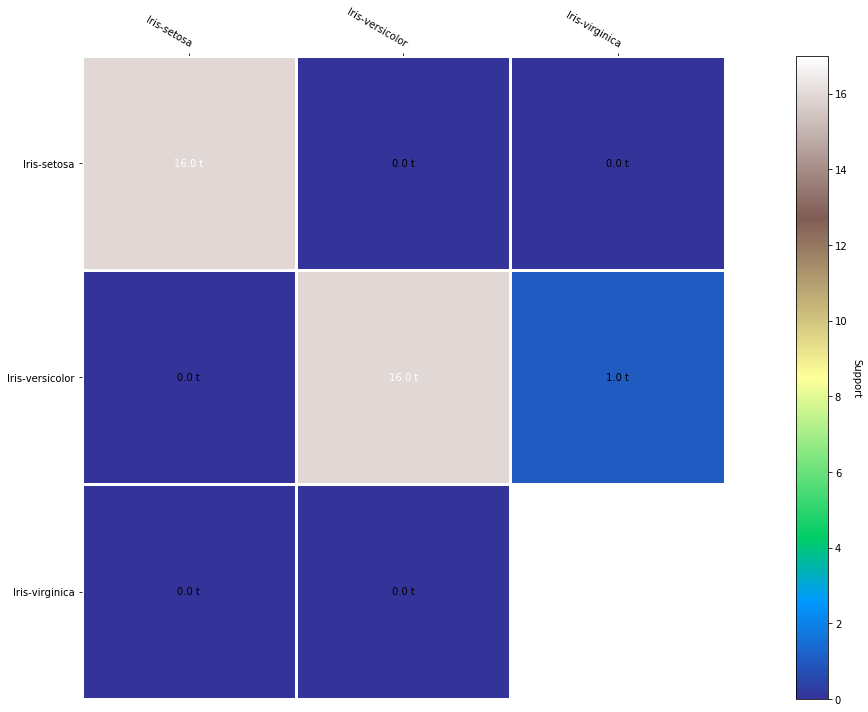

In [12]:
VClassification(trainC).construct_confuation_matrix()